In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

x = [x for x in range(10)]
y_true = [1/2*x + 0.75 + random.random() for x in range(10)]

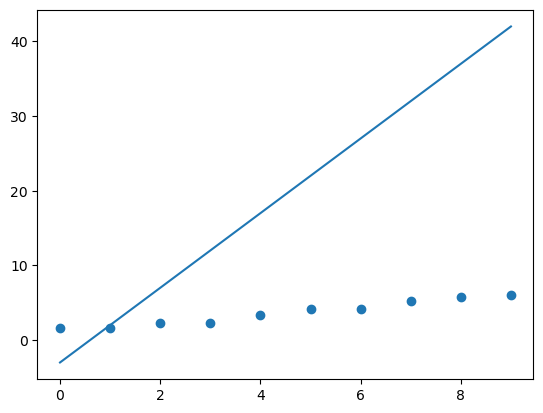

In [4]:
def prediction(w, b):
    y_predicted = [w*x+b for x in x]
    return y_predicted

def loss_fn(y_true, y_predicted):
    diff = [(y_predicted[idx] - y_true[idx])**2 for idx in range(len(y_true))]
    return 1/2*len(y_true) * sum(diff)

w = 5
b = -3

y_predicted = prediction(w, b)
loss = loss_fn(y_true, y_predicted)

plt.scatter(x, y_true)
plt.plot(x, y_predicted)

In [5]:
lr = 0.1

y_predicted = []

for _ in range(100):
    d_w = sum([((w*x+b) - y_true[x]) * x for x in x])/len(x)
    d_b = sum([((w*x+b) - y_true[x]) for x in x])/len(x)

    change_w = d_w * lr
    change_b = d_b * lr

    w = w - change_w
    b = b - change_b

    y_pred = prediction(w, b)
    loss = loss_fn(y_true, y_pred)

    y_predicted.append(y_pred)



-5.809247111940088
-4.586025044274593
14.90157131507264
-1.149286383748687
-24.959975172137565
-7.3760898814311
51.585947403158414
4.957482889899322
-95.57411710823784
-18.38796677478649
187.17745458695384
26.823157557124603
-356.2579589985109
-59.72503780699169
688.0442440484514
106.92752247876278
-1318.9084837170185
-213.02116463519127
2537.9309718503796
402.15374445671165
-4874.0507300406625
-779.7665923659049
9369.979570027943
1491.8968703447092
-18003.72504331875
-2873.4196482466104
34602.020924738725
5515.962561027214
-66493.83111034083
-10606.179136252205
127788.4589183321
20377.02675198212
-245576.22028441835
-39165.11846150982
471942.40158674144
75261.05648758517
-906958.827601997
-144638.76590025128
1742963.366471696
277956.9470856281
-3349560.763408283
-534171.8985602423
6437066.857410321
1026547.9988044652
-12370518.194918217
-1972786.5229356696
23773214.68667265
3791225.68104605
-45686496.63606224
-7285843.132086292
87798650.27690688
14001665.031325303
-168728250.18562123


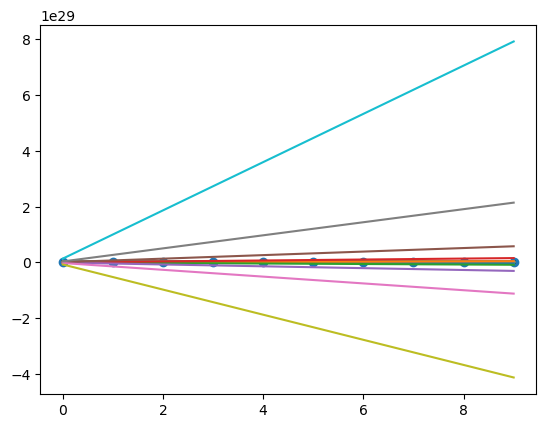

In [6]:
for k in range(len(y_predicted)):
    plt.plot(x, y_predicted[k])

plt.scatter(x, y_true)
plt.show()

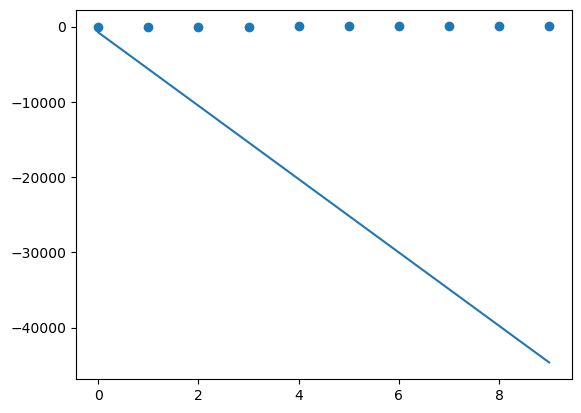

In [12]:
plt.plot(x, y_predicted[10])

plt.scatter(x, y_true)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import numpy as np
import random

%matplotlib ipympl


fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-50, 50))
line, = ax.plot([], [], lw=3)
ax.scatter(x, y_true)


def init():
    line.set_data([], [])
    return line

def animate(i): 
    line.set_data(x, y_predicted[i])
    return line,



anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=1000, blit=True)